In [2]:
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt, cm, colors

def calc_R(x,y, xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c, x, y):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(x, y, *c)
    return Ri - Ri.mean()

def leastsq_circle(x,y):
    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center, ier = optimize.leastsq(f, center_estimate, args=(x,y))
    xc, yc = center
    Ri       = calc_R(x, y, *center)
    R        = Ri.mean()
    residu   = np.sum((Ri - R)**2)
    return xc, yc, R, residu
def plot_data_circle(x,y, xc, yc, R):
    f = plt.figure( facecolor='white')  #figsize=(7, 5.4), dpi=72,
    plt.axis('equal')

    theta_fit = np.linspace(-pi, pi, 180)

    x_fit = xc + R*np.cos(theta_fit)
    y_fit = yc + R*np.sin(theta_fit)
    plt.plot(x_fit, y_fit, 'b-' , label="fitted circle", lw=2)
    plt.plot([xc], [yc], 'bD', mec='y', mew=1)
    plt.xlabel('x')
    plt.ylabel('y')   
    # plot data
    plt.plot(x, y, 'r-.', label='data', mew=1)
    plt.legend(loc='best',labelspacing=0.1 )
    plt.grid()
    plt.title('Least Squares Circle')
    plt.show()

(500, 2)
[[-3.18153553 -1.22451982]
 [ 1.35543929  2.16633839]
 [-0.81830841 -2.35330533]
 [-3.12080993 -1.1443698 ]
 [-2.90902372 -0.51038736]
 [-3.68243761  0.69401867]
 [-2.21258344  2.58579365]
 [ 0.43777019 -2.96823373]
 [-3.23797361  1.52065022]
 [-3.24521784  1.72686169]]
(500, 1)
(500, 1)
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
The ellipse is given by 0.0776x^2 + 0.0315xy+0.125y^2+0.00457x+0.00314y = 1


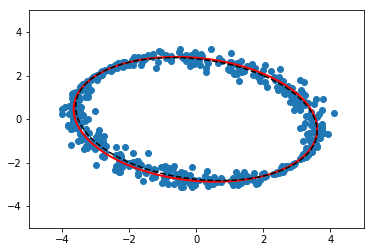

In [8]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 5
beta = 3
N = 500
DIM = 2

np.random.seed(2)

# Generate random points on the unit circle by sampling uniform angles
theta = np.random.uniform(0, 2*np.pi, (N,1))
eps_noise = 0.2 * np.random.normal(size=[N,1])
circle = np.hstack([np.cos(theta), np.sin(theta)])

# Stretch and rotate circle to an ellipse with random linear tranformation
B = np.random.randint(-3, 3, (DIM, DIM))
noisy_ellipse = circle.dot(B) + eps_noise
print(noisy_ellipse.shape)
print(noisy_ellipse[0:10,:])

# Extract x coords and y coords of the ellipse as column vectors
X = noisy_ellipse[:,0:1]
Y = noisy_ellipse[:,1:]
print(X.shape)

# Formulate and solve the least squares problem ||Ax - b ||^2
A = np.hstack([X**2, X * Y, Y**2, X, Y])
b = np.ones_like(X)
print(b.shape)
print(b[0:10,:])
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = 1'.format(x[0], x[1],x[2],x[3],x[4]))

# Plot the noisy data
plt.scatter(X, Y, label='Data Points')

# Plot the original ellipse from which the data was generated
phi = np.linspace(0, 2*np.pi, 1000).reshape((1000,1))
c = np.hstack([np.cos(phi), np.sin(phi)])
ground_truth_ellipse = c.dot(B)
plt.plot(ground_truth_ellipse[:,0], ground_truth_ellipse[:,1], 'k--', label='Generating Ellipse')

# Plot the least squares ellipse
x_coord = np.linspace(-5,5,300)
y_coord = np.linspace(-5,5,300)
X_coord, Y_coord = np.meshgrid(x_coord, y_coord)
Z_coord = x[0] * X_coord ** 2 + x[1] * X_coord * Y_coord + x[2] * Y_coord**2 + x[3] * X_coord + x[4] * Y_coord
plt.contour(X_coord, Y_coord, Z_coord, levels=[1], colors=('r'), linewidths=2)